## Customer Behavioral Analytics : A Statistical Analysis of User Repayment over time

Customer cohort analysis is the act of segmenting customers into groups based on their shared characteristics, and then analyzing those groups to gather targeted insights on their behaviors and actions.

In [ ]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [ ]:
# import data 
accounts_df = pd.read_csv("/content/drive/MyDrive/Data/Account.csv")
customers_df= pd.read_csv("/content/drive/MyDrive/Data/Customer.csv")
payment_df = pd.read_csv("/content/drive/MyDrive/Data/Payment.csv")
payment_plan_df = pd.read_csv("/content/drive/MyDrive/Data/PaymentPlan.csv")

Due the requirements, I prefer to **merge the other relevant data to the payment table.** 
The idea is to have **every payment associated with a region & product.** 
This will ensure that the credit team would be able to filter how the repayment curves differ.

In [ ]:
# columns available in each table
print("Account:", accounts_df.columns,"\n")
print("Customer:", customers_df.columns,"\n")
print("Payment:", payment_df.columns,"\n")
print("Payment Plan", payment_plan_df.columns,"\n")

Account: Index(['AccountId', 'RegistrationDate', 'CustomerId', 'PaymentPlanId'], dtype='object') 

Customer: Index(['CustomerId', 'FirstName', 'LastName', 'Region'], dtype='object') 

Payment: Index(['PaymentId', 'Amount', 'ReceivedWhen', 'AccountId', 'PaymentType'], dtype='object') 

Payment Plan Index(['PaymentPlanId', 'Product', 'DailyValue', 'LoanTerm', 'Deposit',
       'TotalValue'],
      dtype='object') 



Columns needed are: 

Payment Table: **`PaymentId`   `Amount` `ReceivedWhen` `AccountId`**

Payment Plan Table: **`Total Value` `Product`** 

Customer: **`Region`** 

Account Table: **`RegistrationDate`**



In [ ]:
#merge account_customer_plan
cus_account = accounts_df.merge(customers_df, on= "CustomerId").merge(payment_plan_df,on="PaymentPlanId")
cus_account

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FirstName,LastName,Region,Product,DailyValue,LoanTerm,Deposit,TotalValue
0,5000,2020-03-30,4720,63,Michael,Mbori,nairobi,phone,25,300,250,7750
1,5002,2020-06-06,2674,63,Titus,Mbori,kisumu,phone,25,300,250,7750
2,5035,2020-11-25,1097,63,Dorcas,Lwoyelo,kisumu,phone,25,300,250,7750
3,5064,2020-05-02,4483,63,Victor,Warimu,mombasa,phone,25,300,250,7750
4,5116,2020-03-12,4981,63,Victor,Githui,nairobi,phone,25,300,250,7750
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,8546,2020-09-19,3299,57,Frank,Warimu,mombasa,phone,25,200,125,5125
1996,8588,2020-07-14,4392,57,Michael,Nyakwea,kisumu,phone,25,200,125,5125
1997,8879,2020-08-14,2349,57,Obinna,Githui,kisumu,phone,25,200,125,5125
1998,8910,2020-12-02,2406,57,Victor,Warimu,mombasa,phone,25,200,125,5125


In [ ]:
#merge table to the payment data
master_payment_df = payment_df[['PaymentId','Amount','ReceivedWhen','AccountId']].merge(cus_account[['TotalValue','Product','Region','RegistrationDate','AccountId']], on="AccountId")
master_payment_df


,PaymentId,Amount,ReceivedWhen,AccountId,TotalValue,Product,Region,RegistrationDate
0,1000,125.960784,2020-09-13,6717,17600,tv,nairobi,2020-06-07
1,10715,125.960784,2020-09-25,6717,17600,tv,nairobi,2020-06-07
2,10850,125.960784,2021-03-18,6717,17600,tv,nairobi,2020-06-07
3,12360,125.960784,2020-06-14,6717,17600,tv,nairobi,2020-06-07
4,12501,125.960784,2020-07-28,6717,17600,tv,nairobi,2020-06-07
...,...,...,...,...,...,...,...,...
234548,428154,168.574755,2020-11-07,8041,16125,tv,nairobi,2020-10-18
234549,436132,168.574755,2020-10-26,8041,16125,tv,nairobi,2020-10-18
234550,436542,168.574755,2021-02-27,8041,16125,tv,nairobi,2020-10-18
234551,447957,168.574755,2020-11-09,8041,16125,tv,nairobi,2020-10-18


In [ ]:
#Add the cohort to the data by converting registration date to month & year format

master_payment_df['RegistrationDate']=pd.to_datetime(master_payment_df['RegistrationDate'])
master_payment_df['Cohort']=master_payment_df['RegistrationDate'].dt.to_period('M')
master_payment_df

,PaymentId,Amount,ReceivedWhen,AccountId,TotalValue,Product,Region,RegistrationDate,Cohort
0,1000,125.960784,2020-09-13,6717,17600,tv,nairobi,2020-06-07,2020-06
1,10715,125.960784,2020-09-25,6717,17600,tv,nairobi,2020-06-07,2020-06
2,10850,125.960784,2021-03-18,6717,17600,tv,nairobi,2020-06-07,2020-06
3,12360,125.960784,2020-06-14,6717,17600,tv,nairobi,2020-06-07,2020-06
4,12501,125.960784,2020-07-28,6717,17600,tv,nairobi,2020-06-07,2020-06
...,...,...,...,...,...,...,...,...,...
234548,428154,168.574755,2020-11-07,8041,16125,tv,nairobi,2020-10-18,2020-10
234549,436132,168.574755,2020-10-26,8041,16125,tv,nairobi,2020-10-18,2020-10
234550,436542,168.574755,2021-02-27,8041,16125,tv,nairobi,2020-10-18,2020-10
234551,447957,168.574755,2020-11-09,8041,16125,tv,nairobi,2020-10-18,2020-10


In [ ]:
# Add the Months After Column
master_payment_df['Months After']=(pd.to_datetime(master_payment_df['ReceivedWhen']).dt.to_period("M").view(int)-pd.to_datetime(master_payment_df['RegistrationDate']).dt.to_period("M").view(int))
master_payment_df

,PaymentId,Amount,ReceivedWhen,AccountId,TotalValue,Product,Region,RegistrationDate,Cohort,Months After
0,1000,125.960784,2020-09-13,6717,17600,tv,nairobi,2020-06-07,2020-06,3
1,10715,125.960784,2020-09-25,6717,17600,tv,nairobi,2020-06-07,2020-06,3
2,10850,125.960784,2021-03-18,6717,17600,tv,nairobi,2020-06-07,2020-06,9
3,12360,125.960784,2020-06-14,6717,17600,tv,nairobi,2020-06-07,2020-06,0
4,12501,125.960784,2020-07-28,6717,17600,tv,nairobi,2020-06-07,2020-06,1
...,...,...,...,...,...,...,...,...,...,...
234548,428154,168.574755,2020-11-07,8041,16125,tv,nairobi,2020-10-18,2020-10,1
234549,436132,168.574755,2020-10-26,8041,16125,tv,nairobi,2020-10-18,2020-10,0
234550,436542,168.574755,2021-02-27,8041,16125,tv,nairobi,2020-10-18,2020-10,4
234551,447957,168.574755,2020-11-09,8041,16125,tv,nairobi,2020-10-18,2020-10,1


We have the data all the data and we have also created the various Cohorts for futher analysis. 

Now we have to group data by **Cohort, Months After, AccountId, Region & Product**

We are interested in the Total **Amount** received  over the **Total Value**. 


In [ ]:
payment_grouped_df= master_payment_df[['Cohort','Months After', 'Amount', 'TotalValue','AccountId','Region','Product']].groupby(['Cohort', 'Months After','AccountId','Region', 'Product']).agg({'Amount':sum, 'TotalValue':max}).reset_index()
payment_grouped_df

,Cohort,Months After,AccountId,Region,Product,Amount,TotalValue
0,2020-01,0,5077,nairobi,tv,2324.175000,27300
1,2020-01,0,5099,kisumu,solar,1860.635593,18900
2,2020-01,0,5112,mombasa,phone,282.294444,10675
3,2020-01,0,5121,nairobi,solar,2112.388393,10125
4,2020-01,0,5134,nairobi,tv,2892.957589,31125
...,...,...,...,...,...,...,...
18359,2020-12,8,8761,nairobi,phone,132.354740,8000
18360,2020-12,8,8766,nairobi,solar,501.192893,27300
18361,2020-12,8,8774,nairobi,phone,614.075246,10675
18362,2020-12,8,8828,nairobi,tv,691.242851,31125


We are only taking **the first unique value of the Total Value per each AccountId** since we linked it to every payment and replacing the subsequent ones to **Zero**.

There are only 2000 unique accounts, and each account is linked with a total value for the product purchase. However our current table has 18364 rows. Therefore, summing the Total Value will lead to inaccurate results. *italicized text*

In [ ]:
payment_grouped_df['TotalValue']=np.where(payment_grouped_df.duplicated(subset='AccountId'),0,payment_grouped_df['TotalValue'])
payment_grouped_df

,Cohort,Months After,AccountId,Region,Product,Amount,TotalValue
0,2020-01,0,5077,nairobi,tv,2324.175000,27300
1,2020-01,0,5099,kisumu,solar,1860.635593,18900
2,2020-01,0,5112,mombasa,phone,282.294444,10675
3,2020-01,0,5121,nairobi,solar,2112.388393,10125
4,2020-01,0,5134,nairobi,tv,2892.957589,31125
...,...,...,...,...,...,...,...
18359,2020-12,8,8761,nairobi,phone,132.354740,0
18360,2020-12,8,8766,nairobi,solar,501.192893,0
18361,2020-12,8,8774,nairobi,phone,614.075246,0
18362,2020-12,8,8828,nairobi,tv,691.242851,0


`At this point,The data can be exported to Excel or any Data Viz tool like Power BI to create interactive visuals. However, I will proceed to create a pivot table & Viz with Python (The limitation is that Python isn't interactive with end user so they cannot filter with a button like in Power BI)`


In [ ]:
#downloading csv for further analysis (commented out)
#payment_grouped_df.to_csv('/content/drive/MyDrive/Data/new.csv')

The data is now grouped by `Cohort` & `Month After`and summed by **Amount** & **TotalValue**

The dataset has now been reduced to 156 rows.

In [ ]:
cohort_df=payment_grouped_df[['Cohort','Months After', 'Amount', 'TotalValue']].groupby(['Cohort', 'Months After']).sum(['Amount','TotalValue']).reset_index()
cohort_df

,Cohort,Months After,Amount,TotalValue
0,2020-01,0,316689.032291,2498425
1,2020-01,1,225089.388759,0
2,2020-01,2,195116.280447,0
3,2020-01,3,156071.151166,0
4,2020-01,4,134534.379141,0
...,...,...,...,...
151,2020-12,4,214272.340389,0
152,2020-12,5,183803.937491,0
153,2020-12,6,142458.424186,0
154,2020-12,7,98867.044399,0


To accurately calculate the Percentage Paid we will need a **Running Total of the Amount paid by the entire cohort** & **the entire Total Value for the Cohort**.

In [ ]:
cohort_df["cum_amount"]= cohort_df.groupby(['Cohort'])['Amount'].cumsum(axis=0)
cohort_df['cum_total']=cohort_df.groupby(['Cohort'])['TotalValue'].cumsum(axis=0)
cohort_df['percentage_paid']=cohort_df['cum_amount']/cohort_df['cum_total']
cohort_df

,Cohort,Months After,Amount,TotalValue,cum_amount,cum_total,percentage_paid
0,2020-01,0,316689.032291,2498425,3.166890e+05,2498425,0.126755
1,2020-01,1,225089.388759,0,5.417784e+05,2498425,0.216848
2,2020-01,2,195116.280447,0,7.368947e+05,2498425,0.294944
3,2020-01,3,156071.151166,0,8.929659e+05,2498425,0.357412
4,2020-01,4,134534.379141,0,1.027500e+06,2498425,0.411259
...,...,...,...,...,...,...,...
151,2020-12,4,214272.340389,0,1.898621e+06,2871025,0.661304
152,2020-12,5,183803.937491,0,2.082425e+06,2871025,0.725325
153,2020-12,6,142458.424186,0,2.224884e+06,2871025,0.774944
154,2020-12,7,98867.044399,0,2.323751e+06,2871025,0.809380


We can now create a Pivot Chart with the data.
We can also export this and use to create a visualization.
However, this will not include any information on product type & region. 

In [ ]:
cohort_pivot=cohort_df.pivot_table(index = 'Cohort',

                        columns = 'Months After',

                        values = 'percentage_paid')
cohort_pivot

Months After,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Cohort,,,,,,,,,,,,,,,
2020-01,0.126755,0.216848,0.294944,0.357412,0.411259,0.454261,0.491189,0.515817,0.535639,0.552787,0.565054,0.573231,0.581363,0.584706,NaN
2020-02,0.120485,0.221161,0.299979,0.368133,0.421708,0.467488,0.503268,0.528099,0.550044,0.568618,0.583018,0.594578,0.604062,0.611558,0.611638
2020-03,0.137607,0.237811,0.323477,0.391008,0.447480,0.494337,0.530332,0.555640,0.578183,0.597275,0.611758,0.621006,0.629822,0.634625,NaN
2020-04,0.131828,0.239942,0.324339,0.395877,0.455025,0.503474,0.545463,0.573509,0.598232,0.619554,0.633556,0.645802,0.655290,0.660273,0.660314
2020-05,0.149364,0.253864,0.343883,0.416474,0.473187,0.522411,0.563783,0.593338,0.617420,0.635777,0.652695,0.665373,0.677404,0.684349,0.684464
2020-06,0.207637,0.359041,0.478877,0.567719,0.639545,0.695649,0.739368,0.771098,0.793124,0.813989,0.828442,0.839488,0.848856,0.853980,NaN
2020-07,0.225225,0.387880,0.506497,0.601033,0.671909,0.726938,0.769254,0.793434,0.814464,0.831448,0.843153,0.851713,0.858676,0.862067,NaN
2020-08,0.211373,0.361358,0.480621,0.572359,0.644005,0.703285,0.745365,0.777650,0.802295,0.824504,0.842126,0.854383,0.863204,NaN,NaN
2020-09,0.203910,0.358513,0.475746,0.571158,0.646771,0.701453,0.749550,0.783940,0.811977,0.834834,0.850886,0.860500,NaN,NaN,NaN


We can now plot a Cohort Analysis Chart to give us information of how much our credit have recovered from our clients.

In [ ]:

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

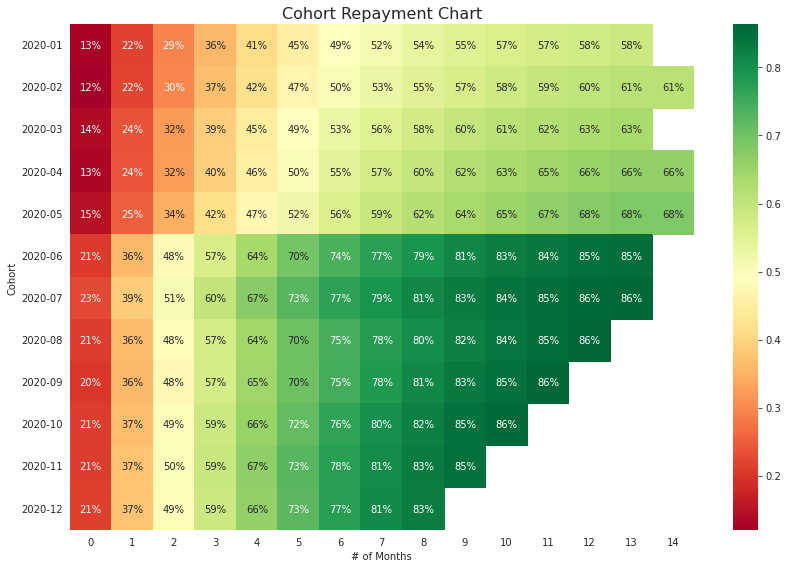

In [ ]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1,figsize=(12, 8))
    
    # retention matrix
    sns.heatmap(cohort_pivot, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax)
    ax.set_title('Cohort Repayment Chart', fontsize=16)
    ax.set(xlabel='# of Months',
              ylabel='Cohort')


    fig.tight_layout()

**Discussions**

*   The visual above shows an improvement in the percentage paid metric over down the row( old cohorts to new cohorts)


*   Generally, it takes less months for the newer cohorts to repay 80% of their credit around 8 months.


*   The highest change in payment percentage in the registration month happened between May 2020 & June 2020






